In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [31]:
import os
import numpy as np
import pandas as pd
import random as rn

import tensorflow as tf
import keras
from keras import utils

from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.models import Sequential

from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.layers import Input, Dense,Conv2D,MaxPool2D,Activation,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [13]:
data_dir='/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification'


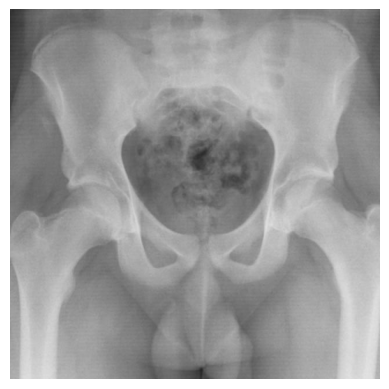

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
image_path='/kaggle/input/bone-break-classification-image-dataset/Bone Break Classification/Bone Break Classification/Avulsion fracture/Test/000002_png.rf.c3e00ebc2db78bc94e644c3f6605dad0.jpg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  
plt.show()

In [14]:
train_data=utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)

Found 1129 files belonging to 10 classes.
Using 1017 files for training.


In [15]:
vald_data=utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40,
)

Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [16]:
for images,lables in train_data.take(1):
  print(images.shape)
  print(lables.shape)

(64, 256, 256, 3)
(64,)


In [17]:
classes=train_data.class_names
print(classes)

['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [18]:
def normalize(image, label):
  return image/255.0, label

train_data = train_data.map(normalize)

In [19]:
vald_data= vald_data.map(normalize)

In [20]:
train_x=[]
train_y=[]
for image,label in train_data:
   train_x.append(image)
   train_y.append(label)
   print(type(train_y))
train_x = tf.concat(train_x, axis=0)
train_y = tf.concat(train_y, axis=0)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [21]:
print(train_y)
type(train_y)

tf.Tensor([2 7 0 ... 8 4 2], shape=(1017,), dtype=int32)


tensorflow.python.framework.ops.EagerTensor

In [22]:
val_x=[]
val_y=[]
for image,label in train_data:
   val_x.append(image)
   val_y.append(label)
val_x = tf.concat(val_x, axis=0)
val_y = tf.concat(val_y, axis=0)

In [24]:
num_classes = 10
train_y = tf.keras.utils.to_categorical(train_y, num_classes=num_classes)
val_y = tf.keras.utils.to_categorical(val_y, num_classes=num_classes)

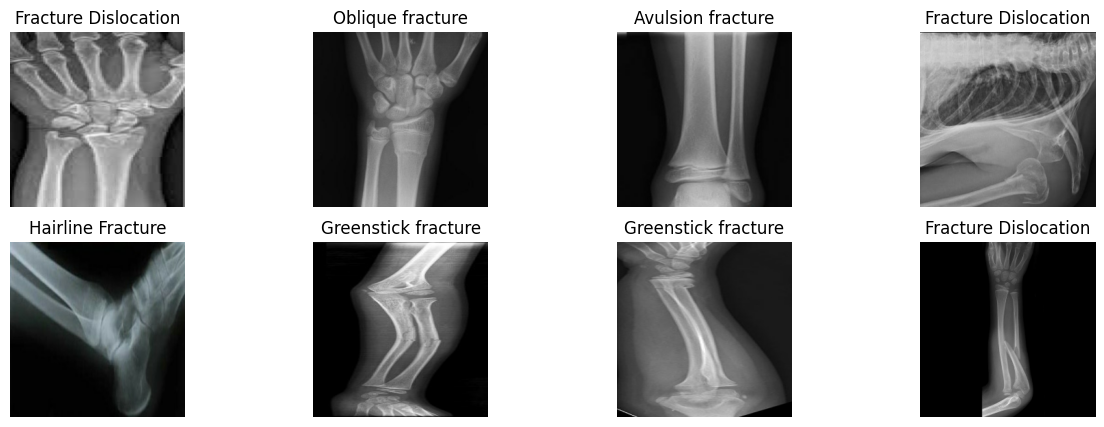

In [25]:
class_labels=["Avulsion fracture","Comminuted fracture","Fracture Dislocation","Greenstick fracture",
              "Hairline Fracture","Impacted fracture","Longitudinal fracture","Oblique fracture",
              "Pathological fracture","Spiral Fracture"]

fig, axes = plt.subplots(2, 4, figsize=(15, 5))


for i, ax in enumerate(axes.flat):
   
    image, label = train_x[i], train_y[i]

    
    ax.imshow(image, cmap='gray')

    
    ax.set_title(f"{class_labels[np.argmax(label)]}")
    ax.axis('off')


plt.show()


In [28]:
model = Sequential()
model.add(Conv2D(60, (3, 3), activation='relu', input_shape=(256, 256, 3)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(120, (3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 60)   │         1,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 60)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 125, 125, 120)  │        64,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 120)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 461280)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 40)             │    18,451,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,518,250 (70.64 MB)

 Trainable params: 18,518,250 (70.64 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(train_x, train_y, batch_size=10, epochs=5,
          validation_data=(val_x,val_y))

Epoch 1/5


I0000 00:00:1725007382.149091     144 service.cc:145] XLA service 0x7f8fbc005d20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725007382.149206     144 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725007382.149215     144 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  5/102 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.0810 - loss: 8.0295

I0000 00:00:1725007387.996155     144 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.1078 - loss: 3.3133

I0000 00:00:1725007395.064357     142 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion', 64 bytes spill stores, 64 bytes spill loads



102/102 ━━━━━━━━━━━━━━━━━━━━ 17s 97ms/step - accuracy: 0.1080 - loss: 3.3060 - val_accuracy: 0.2498 - val_loss: 2.2697
Epoch 2/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.2359 - loss: 2.2319 - val_accuracy: 0.4130 - val_loss: 1.9358
Epoch 3/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.4160 - loss: 1.8130 - val_accuracy: 0.6608 - val_loss: 1.2763
Epoch 4/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6457 - loss: 1.1922 - val_accuracy: 0.8584 - val_loss: 0.6459
Epoch 5/5
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8318 - loss: 0.6233 - val_accuracy: 0.9381 - val_loss: 0.3150


In [34]:
loss, accuracy = model.evaluate(val_x,val_y)
print('Test accuracy:', accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9360 - loss: 0.3181
Test accuracy: 0.9380530714988708


In [35]:
pred = model.predict(val_x)
print(pred)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
[[2.08184611e-05 2.18696401e-01 1.09048115e-05 ... 4.89472318e-03
  1.72684575e-11 3.32672685e-01]
 [8.98275431e-03 1.71349198e-02 7.61881948e-01 ... 1.45890843e-02
  2.62283832e-02 3.54649425e-02]
 [8.89010917e-05 9.85923107e-05 3.57844372e-04 ... 1.13171095e-03
  8.40494158e-06 5.64264102e-09]
 ...
 [1.59852716e-05 3.86422698e-07 6.91303342e-07 ... 1.48971070e-04
  9.99791682e-01 9.22979439e-07]
 [3.72540243e-02 3.58586684e-02 5.60690369e-03 ... 2.73130145e-02
  7.87074957e-03 1.77057425e-03]
 [1.53237896e-03 2.29530456e-03 9.92805064e-01 ... 2.48966280e-05
  1.08189582e-07 1.60527081e-04]]


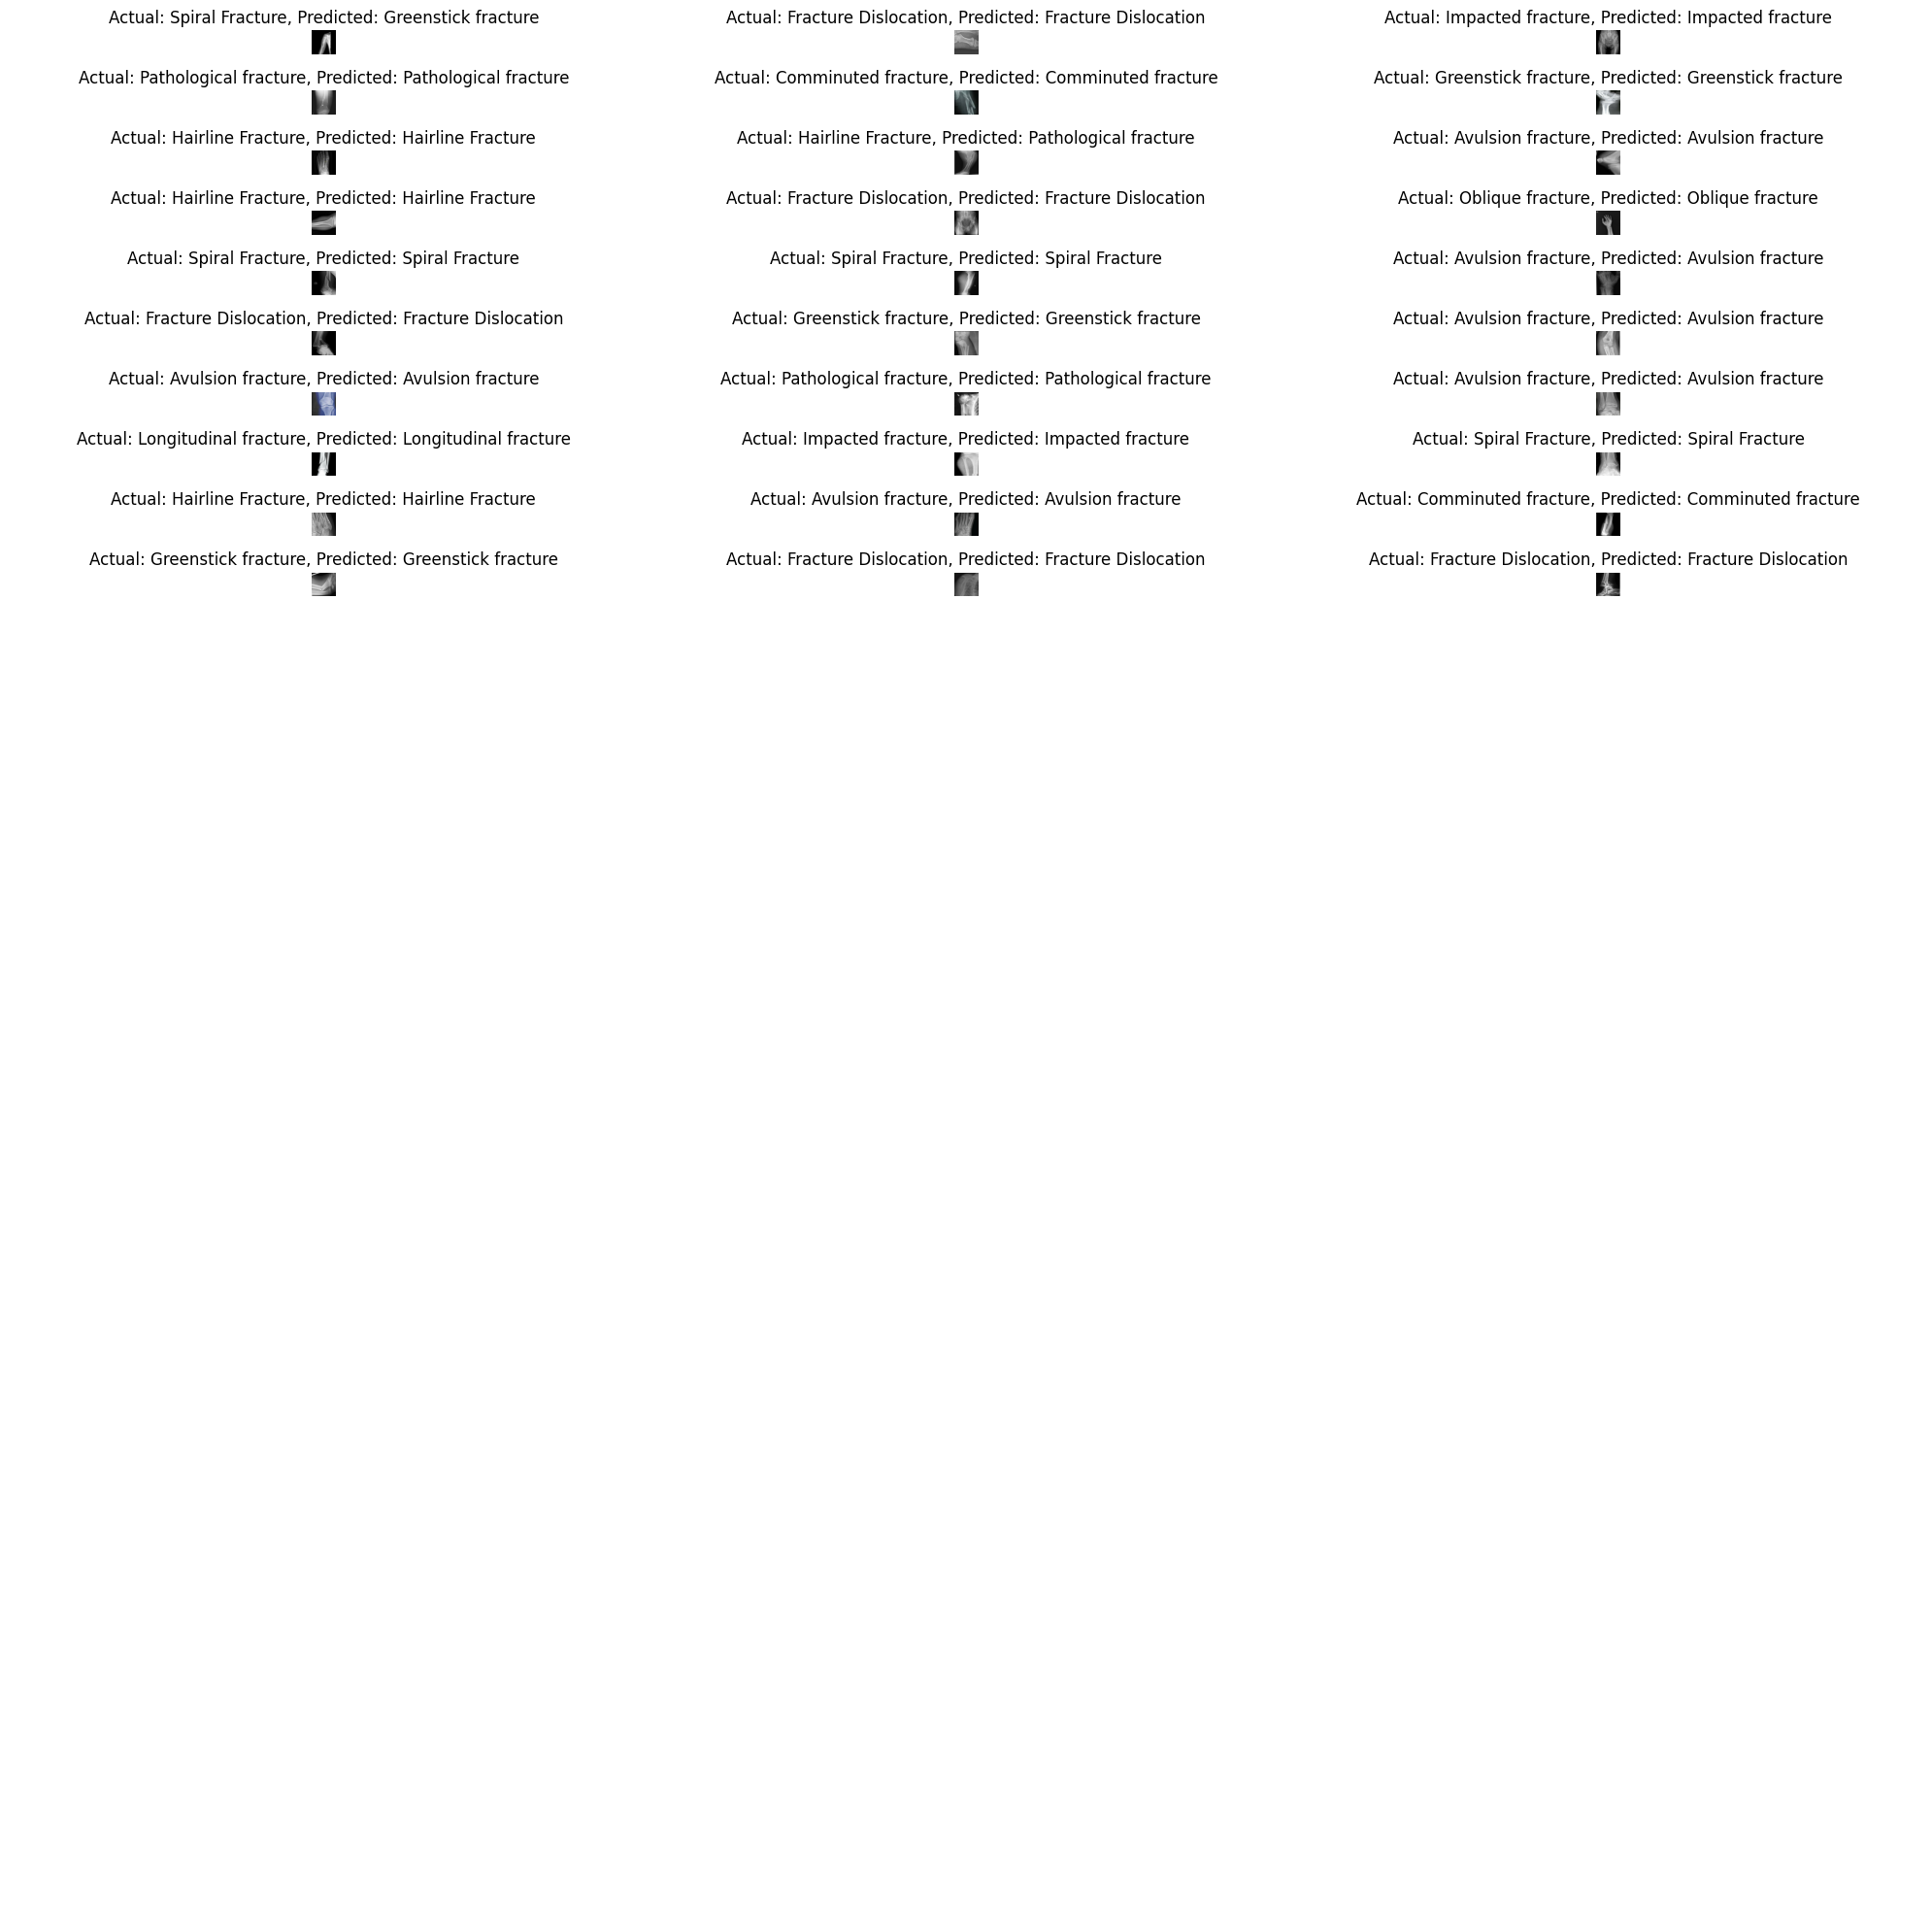

In [36]:
num_images_to_display = 30
num_columns = 3
num_rows = (num_images_to_display + num_columns - 1) 

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 20))
for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        ax.imshow(val_x[i])
        actual_label = class_labels[np.argmax(val_y[i])]
        predicted_label = class_labels[np.argmax(pred[i])]
        ax.set_title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [37]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [38]:
model.save('bone_break_classify.h5')